# W4995-AML Project team 32

This note book represents team project of group 32 for W4995-AML course

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')

## Data Loading

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
meal_info = pd.read_csv('./data/meal_info.csv')
center_info = pd.read_csv('./data/fulfilment_center_info.csv')

## Exploratory Data Analysis

In [3]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [8]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


**Exciting, there is no obvious missing data**

In [9]:
train_data = pd.merge(train_data,meal_info,on='meal_id',how='left')
train_data = pd.merge(train_data,center_info, on='center_id', how='left')

In [10]:
train_data = train_data.drop(columns=["center_id", "meal_id"])

In [11]:
train_data.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


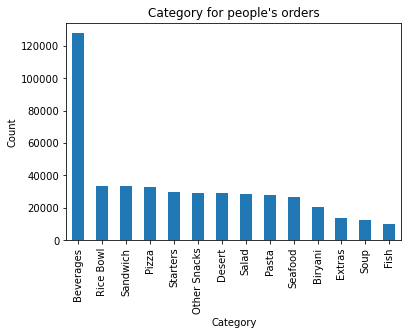

In [18]:
train_data['category'].value_counts().plot(kind='bar')
plt.title("Category for people's orders")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

It's obvious that the Beverage is the most popular product for people and fish is the least. Also, they think 
rice bowl, sandwich, and pizza which are main courses have the same value through their life. Hence, we can provide
more beverages and less fish.

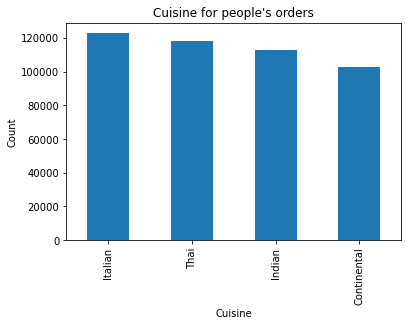

In [19]:
train_data['cuisine'].value_counts().plot(kind='bar')
plt.title("Cuisine for people's orders")
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

We can observe that Italian is the most popular style for people to accept, then thai food is the second popular and Continental is the least. However, the intensity of the popular for those cuisine styles are not so much different from each other, which we can conclude the cuisine is globaly accpected for people.

In [25]:
train_data_group1 = train_data.groupby(by=['city_code'],dropna=True).sum() # group by city_code, sum up number in rest columns
train_data_group1.reset_index(level=0, inplace=True)
train_data_group1

,city_code,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,op_area
0,456,8375195020,501014,2.230563e+06,2.379073e+06,455,1065,1937221,376096,28207.2
1,461,7199535089,435919,1.947341e+06,2.060796e+06,538,551,1158164,195942,22475.7
2,473,7315369502,437047,1.987256e+06,2.110546e+06,520,628,1214982,450835,26347.5
3,478,6278827384,372444,1.625223e+06,1.741618e+06,498,437,637527,386617,12050.4
4,485,7137993866,431437,1.912448e+06,2.032408e+06,515,565,1451046,439824,21705.6
5,515,6350826312,375914,1.622416e+06,1.733636e+06,511,482,894009,391545,15255.0
6,517,16377622901,974327,4.320228e+06,4.617325e+06,897,1519,3205569,734104,50080.0
7,522,16860730917,1005792,4.454606e+06,4.759807e+06,910,1363,3375905,753704,53157.2
8,526,54460969019,3234304,1.454972e+07,1.543552e+07,3928,4126,9207953,1479850,164640.4
9,541,5616570486,334282,1.463310e+06,1.566797e+06,481,379,768013,346577,12602.8


In [28]:
train_data_2=train_data_group1.sort_values(by="num_orders" , ascending=False)
train_data_2.head()

,city_code,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,op_area
17,590,68500380033,4096327,1.809698e+07,1.932221e+07,3863,5462,19849062,3065776,243376.6
8,526,54460969019,3234304,1.454972e+07,1.543552e+07,3928,4126,9207953,1479850,164640.4
29,638,25075737939,1501585,6.610136e+06,7.074404e+06,1366,2518,6662450,1122632,120947.8
22,604,16311572669,973022,4.279638e+06,4.606252e+06,904,1476,3533367,731472,55950.6
7,522,16860730917,1005792,4.454606e+06,4.759807e+06,910,1363,3375905,753704,53157.2


In [37]:
train_data_2.tail()

,city_code,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,op_area
35,658,6981698535,418663,1882743.50,2006411.62,542,612,813948,190094,21804.9
9,541,5616570486,334282,1463309.87,1566797.27,481,379,768013,346577,12602.8
43,693,5774136160,345139,1465443.75,1567617.08,489,484,743148,157318,12955.6
48,702,6589564742,390419,1758719.84,1868701.41,518,438,691044,184240,14739.2
3,478,6278827384,372444,1625222.55,1741617.52,498,437,637527,386617,12050.4


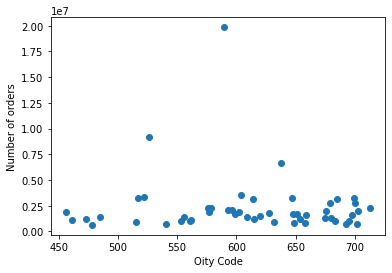

In [36]:
plt.scatter(train_data_2.city_code, train_data_2.num_orders)
plt.xlabel('Oity Code')
plt.ylabel('Number of orders')
plt.title(Relash)
plt.show()

I created a dataframe which grouped by city_code and then I sorted by the order numbers and I found the city_code which is 590 has the highest order numbers. This means people in this area order products most and people in city_code 478 odered the least number.